## Original Data

In [818]:
data_org=data

#normalize
y= data_org["diagnosis"]
X = data_org.drop(columns=["diagnosis"])

X = (X -np.min(X))/(np.max(X)-np.min(X)).values

#Split the train, test and validation 
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y,test_size = .2)

In [819]:
#Blance the train data by using upsampling
#Train data

counter = Counter(y_train)
counter
upsample = SMOTE()
X_train, y_train = upsample.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)

Counter({'B': 287, 'M': 287})


In [820]:
y_test.replace('M',1,inplace=True)
y_test.replace('B',0,inplace=True)
y_train.replace('M',1,inplace=True)
y_train.replace('B',0,inplace=True)

### Logistic regression

In [821]:
LR = LogisticRegression(max_iter = 200)
LR.fit(X_train,y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(LR, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
LR_fit_time = scores['fit_time'].mean()
LR_score_time = scores['score_time'].mean()
LR_accuracy = scores['test_accuracy'].mean()
LR_precision = scores['test_precision_macro'].mean()
LR_recall = scores['test_recall_macro'].mean()
LR_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of Logistic Regression is: {round(cross_val_score(LR,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of Logistic Regression is: 0.9703


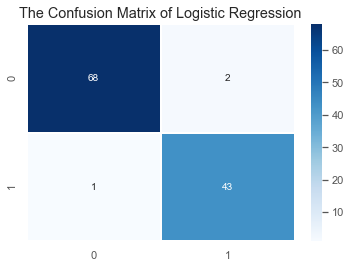

In [822]:
y_pred = LR.predict(X_test) #Predict data for eveluating 
cmLR = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Logistic Regression')
sns.heatmap(cmLR,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');total_LR=sum(sum(cmLR))


In [823]:
#####from confusion matrix calculate accuracy
accuracy_LR=(cmLR[0,0]+cmLR[1,1])/total_LR
print(f"Accuracy: {round(accuracy_LR, 4)}")

sensitivity_LR = cmLR[0,0]/(cmLR[0,0]+cmLR[1,0])
print(f"Sensitivity: {round(sensitivity_LR, 4)}")

specificity_LR = cmLR[1,1]/(cmLR[0,1]+cmLR[1,1])
print(f"Specificity: {round(specificity_LR, 4)}")

balanced_accuracy_LR=(sensitivity_LR+specificity_LR )*0.5
print(f"Balanced accuracy of Logistic Regression : {round(balanced_accuracy_LR, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9855
Specificity: 0.9556
Balanced accuracy of Logistic Regression : 0.9705


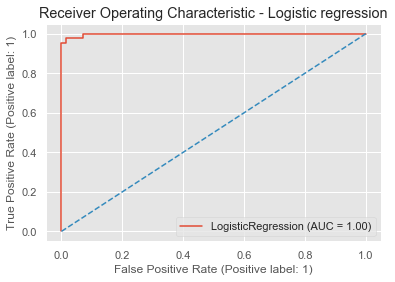

In [824]:
plot_roc_curve(LR, X_test, y_test);
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Logistic regression');

***

### KNN

Accuracy by using KfoldCrossVal score of KNN is: 0.9737  at K = 4


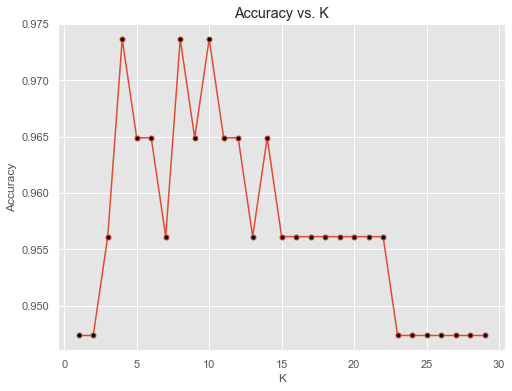

In [825]:
accuracy=[]
for i in range(1, 30):
    KNN = KNeighborsClassifier(n_neighbors = i)
    KNN = KNN.fit(X_train, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
    scores = cross_validate(KNN, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    KNN_fit_time = scores['fit_time'].mean()
    KNN_score_time = scores['score_time'].mean()
    KNN_accuracy = scores['test_accuracy'].mean()
    KNN_precision = scores['test_precision_macro'].mean()
    KNN_recall = scores['test_recall_macro'].mean()
    KNN_f1 = scores['test_f1_weighted'].mean()

   
    accuracy.append(KNN.score(X_test,y_test))

print(f"Accuracy by using KfoldCrossVal score of KNN is: {round(max(accuracy), 4)}"," at K = {}".format(accuracy.index(max(accuracy))+1))

plt.figure(figsize=(8,6))
plt.plot(range(1,30),accuracy, 
         marker='o',markerfacecolor='black', markersize=5)
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy');

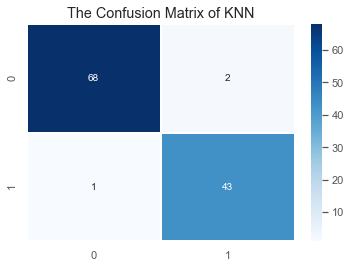

In [827]:
KNN = KNeighborsClassifier(n_neighbors = 4)
KNN = KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
cmKNN = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of KNN')
sns.heatmap(cmKNN,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [828]:
total_KNN=sum(sum(cmKNN))
#####from confusion matrix calculate accuracy
accuracy_KNN=(cmKNN[0,0]+cmKNN[1,1])/total_KNN
print(f"Accuracy: {round(accuracy_KNN, 4)}")

sensitivity_KNN = cmKNN[0,0]/(cmKNN[0,0]+cmKNN[1,0])
print(f"Sensitivity: {round(sensitivity_KNN, 4)}")

specificity_KNN = cmKNN[1,1]/(cmKNN[0,1]+cmKNN[1,1])
print(f"Specificity: {round(specificity_KNN, 4)}")

balanced_accuracy_KNN=(sensitivity_KNN+specificity_KNN )*0.5
print(f"Balanced accuracy of KNN: {round(balanced_accuracy_KNN, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9855
Specificity: 0.9556
Balanced accuracy of KNN: 0.9705


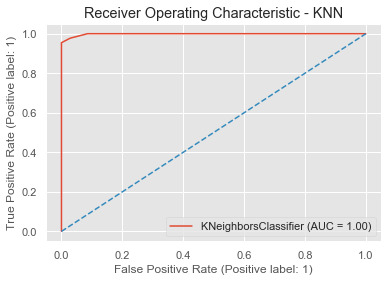

In [829]:
plot_roc_curve(KNN, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - KNN');

***

### Naive Bayes

In [830]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB = NB.fit(X_train, y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(NB, X_train, y_train, scoring=scoring, cv=10)

sorted(scores.keys())
NB_fit_time = scores['fit_time'].mean()
NB_score_time = scores['score_time'].mean()
NB_accuracy = scores['test_accuracy'].mean()
NB_precision = scores['test_precision_macro'].mean()
NB_recall = scores['test_recall_macro'].mean()
NB_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of Naive Bayes is: {round(cross_val_score(NB,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of Naive Bayes is: 0.939


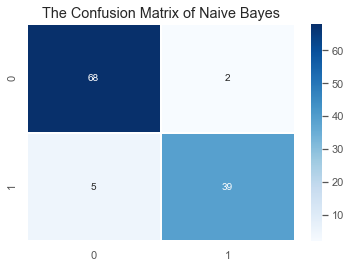

In [831]:
y_pred = NB.predict(X_test)
cmNB = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Naive Bayes')
sns.heatmap(cmNB,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [832]:
total_NB=sum(sum(cmNB))
#####from confusion matrix calculate accuracy
accuracy_NB=(cmNB[0,0]+cmNB[1,1])/total_NB
print(f"Accuracy: {round(accuracy_NB, 4)}")

sensitivity_NB = cmNB[0,0]/(cmNB[0,0]+cmNB[1,0])
print(f"Sensitivity: {round(sensitivity_NB, 4)}")

specificity_NB = cmNB[1,1]/(cmNB[0,1]+cmNB[1,1])
print(f"Specificity: {round(specificity_NB, 4)}")

balanced_accuracy_NB=(sensitivity_NB+specificity_NB )*0.5
print(f"Balanced accuracy of Naive Bayes: {round(balanced_accuracy_NB, 4)}")

Accuracy: 0.9386
Sensitivity: 0.9315
Specificity: 0.9512
Balanced accuracy of Naive Bayes: 0.9414


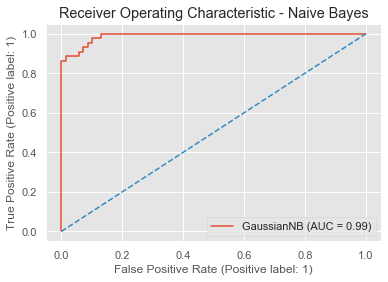

In [833]:
plot_roc_curve(NB, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Naive Bayes');

***

### Random Forest

Accuracy by using KfoldCrossVal score of Random Forest is: 0.9561  at N = 2


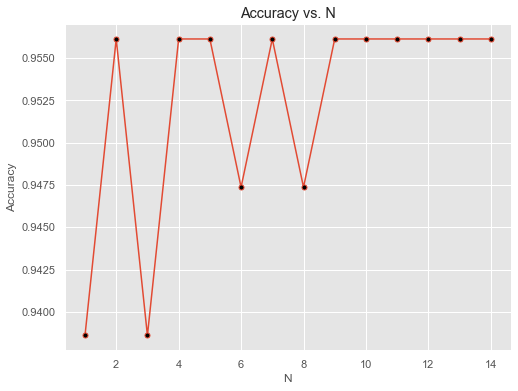

In [834]:
accuracy=[]
for i in range(1, 15):
    RF = RandomForestClassifier(n_estimators = i,random_state=0)
    RF = RF.fit(X_train, y_train)
    scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
    scores = cross_validate(RF, X_train, y_train, scoring=scoring, cv=10)
    sorted(scores.keys())
    RF_fit_time = scores['fit_time'].mean()
    RF_score_time = scores['score_time'].mean()
    RF_accuracy = scores['test_accuracy'].mean()
    RF_precision = scores['test_precision_macro'].mean()
    RF_recall = scores['test_recall_macro'].mean()
    RF_f1 = scores['test_f1_weighted'].mean()
    accuracy.append(RF.score(X_test,y_test))

print(f"Accuracy by using KfoldCrossVal score of Random Forest is: {round(max(accuracy), 4)}"," at N = {}".format(accuracy.index(max(accuracy))+1))

plt.figure(figsize=(8,6))
plt.plot(range(1,15),accuracy, 
         marker='o',markerfacecolor='black', markersize=5)
plt.title('Accuracy vs. N')
plt.xlabel('N')
plt.ylabel('Accuracy');

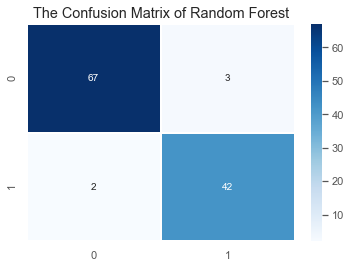

In [836]:
RF = RandomForestClassifier(n_estimators = 2,random_state=0)
RF = RF.fit(X_train, y_train)
y_pred = RF.predict(X_test)
cmRF = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of Random Forest')
sns.heatmap(cmRF,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [837]:
total_RF=sum(sum(cmRF))
#####from confusion matrix calculate accuracy
accuracy_RF=(cmRF[0,0]+cmRF[1,1])/total_RF
print(f"Accuracy: {round(accuracy_RF, 4)}")

sensitivity_RF = cmRF[0,0]/(cmRF[0,0]+cmRF[1,0])
print(f"Sensitivity: {round(sensitivity_RF, 4)}")

specificity_RF = cmRF[1,1]/(cmRF[0,1]+cmRF[1,1])
print(f"Specificity: {round(specificity_RF, 4)}")

balanced_accuracy_RF=(sensitivity_RF+specificity_RF )*0.5
print(f"Balanced accuracy of Random Forest : {round(balanced_accuracy_RF, 4)}")

Accuracy: 0.9561
Sensitivity: 0.971
Specificity: 0.9333
Balanced accuracy of Random Forest : 0.9522


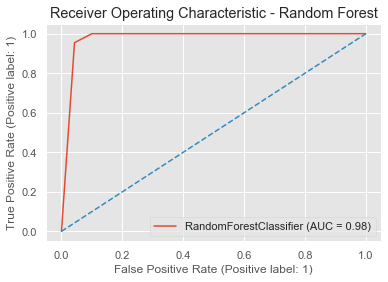

In [838]:
plot_roc_curve(RF, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - Random Forest');

In [839]:
# Feature Importance
def FeatureImportance (_model):
    fi = pd.DataFrame({'feature': list(X_train.columns),
                       'importance': _model.feature_importances_}).sort_values('importance', ascending = False)
    return fi
FeatureImportance(RF)

,feature,importance
22,perimeter_worst,0.433841
6,concavity_mean,0.312614
26,concavity_worst,0.045605
2,perimeter_mean,0.044219
20,radius_worst,0.038011
21,texture_worst,0.023543
1,texture_mean,0.019036
28,symmetry_worst,0.011418
12,perimeter_se,0.009987
19,fractal_dimension_se,0.008879


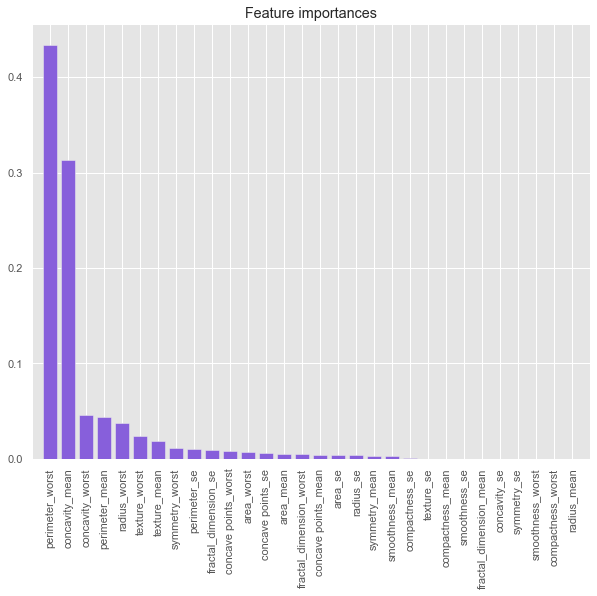

In [840]:
# Plot the feature importances of the forest

importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

plt.figure(1, figsize=(10,8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="#875FDB", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices],rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

***

### SVM

In [841]:
# Create a Support Vector Classifier

svc = svm.SVC()

# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_
svc

SVC(C=10, kernel='linear')

In [842]:
SVM_linear = SVC(kernel='linear',probability = True,C=10)
SVM_linear=SVM_linear.fit(X_train, y_train)
scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM_linear, X_train, y_train, scoring=scoring, cv=10)
sorted(scores.keys())
SVM_linear_fit_time = scores['fit_time'].mean()
SVM_linear_score_time = scores['score_time'].mean()
SVM_linear_accuracy = scores['test_accuracy'].mean()
SVM_linear_precision = scores['test_precision_macro'].mean()
SVM_linear_recall = scores['test_recall_macro'].mean()
SVM_linear_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of SVM (linear) is: {round(cross_val_score(SVM_linear,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of SVM (linear) is: 0.9756


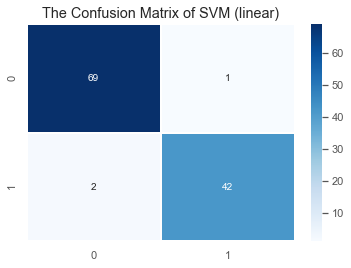

In [843]:
y_pred = SVM_linear.predict(X_test)
cm_linear = confusion_matrix(y_test,y_pred)
f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of SVM (linear)')
sns.heatmap(cm_linear,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [844]:
total_SVM_linear=sum(sum(cm_linear))
#####from confusion matrix calculate accuracy
accuracy_SVM_linear=(cm_linear[0,0]+cm_linear[1,1])/total_SVM_linear
print(f"Accuracy: {round(accuracy_SVM_linear, 4)}")

sensitivity_SVM_linear = cm_linear[0,0]/(cm_linear[0,0]+cm_linear[1,0])
print(f"Sensitivity: {round(sensitivity_SVM_linear, 4)}")

specificity_SVM_linear = cm_linear[1,1]/(cm_linear[0,1]+cm_linear[1,1])
print(f"Specificity: {round(specificity_SVM_linear, 4)}")

balanced_accuracy_SVM_linear=(sensitivity_SVM_linear+specificity_SVM_linear )*0.5
print(f"Balanced accuracy of SVM(linear): {round(balanced_accuracy_SVM_linear, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9718
Specificity: 0.9767
Balanced accuracy of SVM(linear): 0.9743


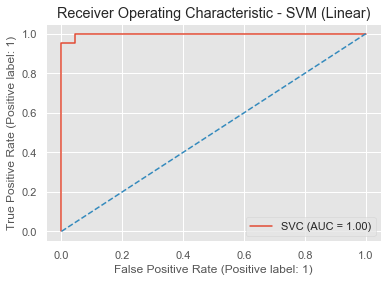

In [845]:
plot_roc_curve(SVM_linear, X_test, y_test)
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - SVM (Linear)');

In [846]:
#SVM(rbf)
# Hyperparameter Optimization
parameters = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

# Run the grid search
grid_obj = GridSearchCV(svc, parameters)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the svc to the best combination of parameters
svc = grid_obj.best_estimator_
svc

SVC(C=1000, gamma=0.001)

In [847]:
SVM_rbf = SVC(kernel='rbf',probability = True,C=1000, gamma=0.001)
SVM_rbf=SVM_rbf.fit(X_train, y_train)
scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted']
scores = cross_validate(SVM_rbf, X_train, y_train, scoring=scoring, cv=10)
sorted(scores.keys())
SVM_rbf_fit_time = scores['fit_time'].mean()
SVM_rbf_score_time = scores['score_time'].mean()
SVM_rbf_accuracy = scores['test_accuracy'].mean()
SVM_rbf_precision = scores['test_precision_macro'].mean()
SVM_rbf_recall = scores['test_recall_macro'].mean()
SVM_rbf_f1 = scores['test_f1_weighted'].mean()


print(f"Accuracy by using KfoldCrossVal score of SVM (rbf) is: {round(cross_val_score(SVM_rbf,X_train,y_train,cv=10).mean(), 4)}")

Accuracy by using KfoldCrossVal score of SVM (rbf) is: 0.9738


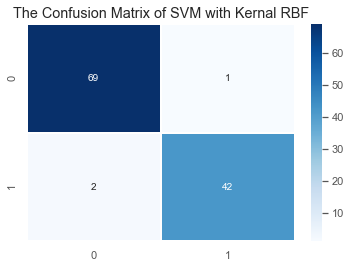

In [848]:
y_pred=SVM_rbf.predict(X_test)
cm_rbf = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize = (6,4))
plt.title('The Confusion Matrix of SVM with Kernal RBF')
sns.heatmap(cm_rbf,annot = True,linewidth = 1,fmt =".0f",ax = ax,cmap='Blues');

In [849]:
total_SVM_rbf=sum(sum(cm_rbf))
#####from confusion matrix calculate accuracy
accuracy_SVM_rbf=(cm_rbf[0,0]+cm_rbf[1,1])/total_SVM_rbf
print(f"Accuracy: {round(accuracy_SVM_rbf, 4)}")

sensitivity_SVM_rbf = cm_rbf[0,0]/(cm_rbf[0,0]+cm_rbf[1,0])
print(f"Sensitivity: {round(sensitivity_SVM_rbf, 4)}")

specificity_SVM_rbf = cm_rbf[1,1]/(cm_rbf[0,1]+cm_rbf[1,1])
print(f"Specificity: {round(specificity_SVM_rbf, 4)}")

balanced_accuracy_SVM_rbf=(sensitivity_SVM_rbf+specificity_SVM_rbf )*0.5
print(f"Balanced accuracy of SVM(rbf) : {round(balanced_accuracy_SVM_rbf, 4)}")

Accuracy: 0.9737
Sensitivity: 0.9718
Specificity: 0.9767
Balanced accuracy of SVM(rbf) : 0.9743


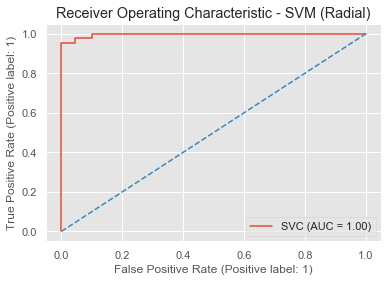

In [850]:
plot_roc_curve(SVM_rbf, X_test, y_test);
plt.plot([0, 1], ls="--")
plt.title('Receiver Operating Characteristic - SVM (Radial)');

In [851]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score
models_correlation = pd.DataFrame({
    'Model'       : ['Logistic Regression','Random forests','Naive Bayes','K-Nearest Neighbors', 'Support Vector Machine_linear','Support Vector Machine_radial'],
    'Fitting time': [LR_fit_time, RF_fit_time,NB_fit_time, KNN_fit_time,SVM_linear_fit_time,SVM_rbf_fit_time],
    'Scoring time': [LR_score_time,RF_score_time,NB_score_time,  KNN_score_time,SVM_linear_score_time,SVM_rbf_score_time  ],
    'Accuracy'    : [LR_accuracy, RF_accuracy, NB_accuracy, KNN_accuracy,SVM_linear_accuracy,SVM_rbf_accuracy ],
    'Balanced accuracy' :[balanced_accuracy_LR, balanced_accuracy_RF, balanced_accuracy_NB,balanced_accuracy_KNN,balanced_accuracy_SVM_linear, balanced_accuracy_SVM_rbf],
    'Precision'   : [LR_precision, RF_precision, NB_precision, KNN_precision, SVM_linear_precision,SVM_rbf_precision],
    'Recall'      : [LR_recall,RF_recall,NB_recall,KNN_recall,SVM_linear_recall,SVM_rbf_recall],
    'F1_score'    : [LR_f1, RF_f1, NB_f1, KNN_f1, SVM_linear_f1,SVM_rbf_f1],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Balanced accuracy', 'Precision',  'Recall','F1_score'])

models_correlation.sort_values(by='Balanced accuracy', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Balanced accuracy,Precision,Recall,F1_score
4,Support Vector Machine_linear,0.017430,0.006370,0.975590,0.974288,0.976352,0.975616,0.975578
5,Support Vector Machine_radial,0.021640,0.005950,0.973835,0.974288,0.974677,0.973830,0.973820
0,Logistic Regression,0.011073,0.006284,0.970327,0.970531,0.971668,0.970259,0.970298
3,K-Nearest Neighbors,0.002522,0.006655,0.959891,0.970531,0.961244,0.959914,0.959860
1,Random forests,0.026830,0.005807,0.966848,0.952174,0.967390,0.966810,0.966840
2,Naive Bayes,0.004364,0.006120,0.938990,0.941363,0.941817,0.938978,0.938890
